___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV,cross_val_score
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    auc,
)
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import ClusterCentroids
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [2]:
!pip install scikit-learn==1.2.2

In [3]:
import xgboost

xgboost.__version__

'1.7.3'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_M = pd.read_csv('ANSUR II MALE Public.csv', encoding="latin-1")
df_F = pd.read_csv('ANSUR II FEMALE Public.csv')



In [5]:
print(df_M.shape)
print(df_F.shape)

(4082, 108)
(1986, 108)


In [6]:
df = pd.concat([df_M, df_F])
df = df.reset_index()
df

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,19

# Explore Data

In [7]:
df.describe()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
count,6068.000000,4082.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,1986.000000
mean,1697.499341,20003.370897,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.0599

In [8]:
df.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [9]:
df["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [10]:
df = df.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis= 1,
)

# "SubjectsBirthLocation"
# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [11]:
df.groupby("DODRace").count()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
3,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
4,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
6,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59

In [12]:
# Just DODRace with > 500 observations
df = df.query("DODRace in [1, 2, 3]")
df.groupby("DODRace").count()
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [149]:
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)


Series([], Name: count, dtype: int64)

In [14]:
df["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [15]:
#detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Calculate the number of null values in the column
    null_count = df[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
df.duplicated().sum()

0

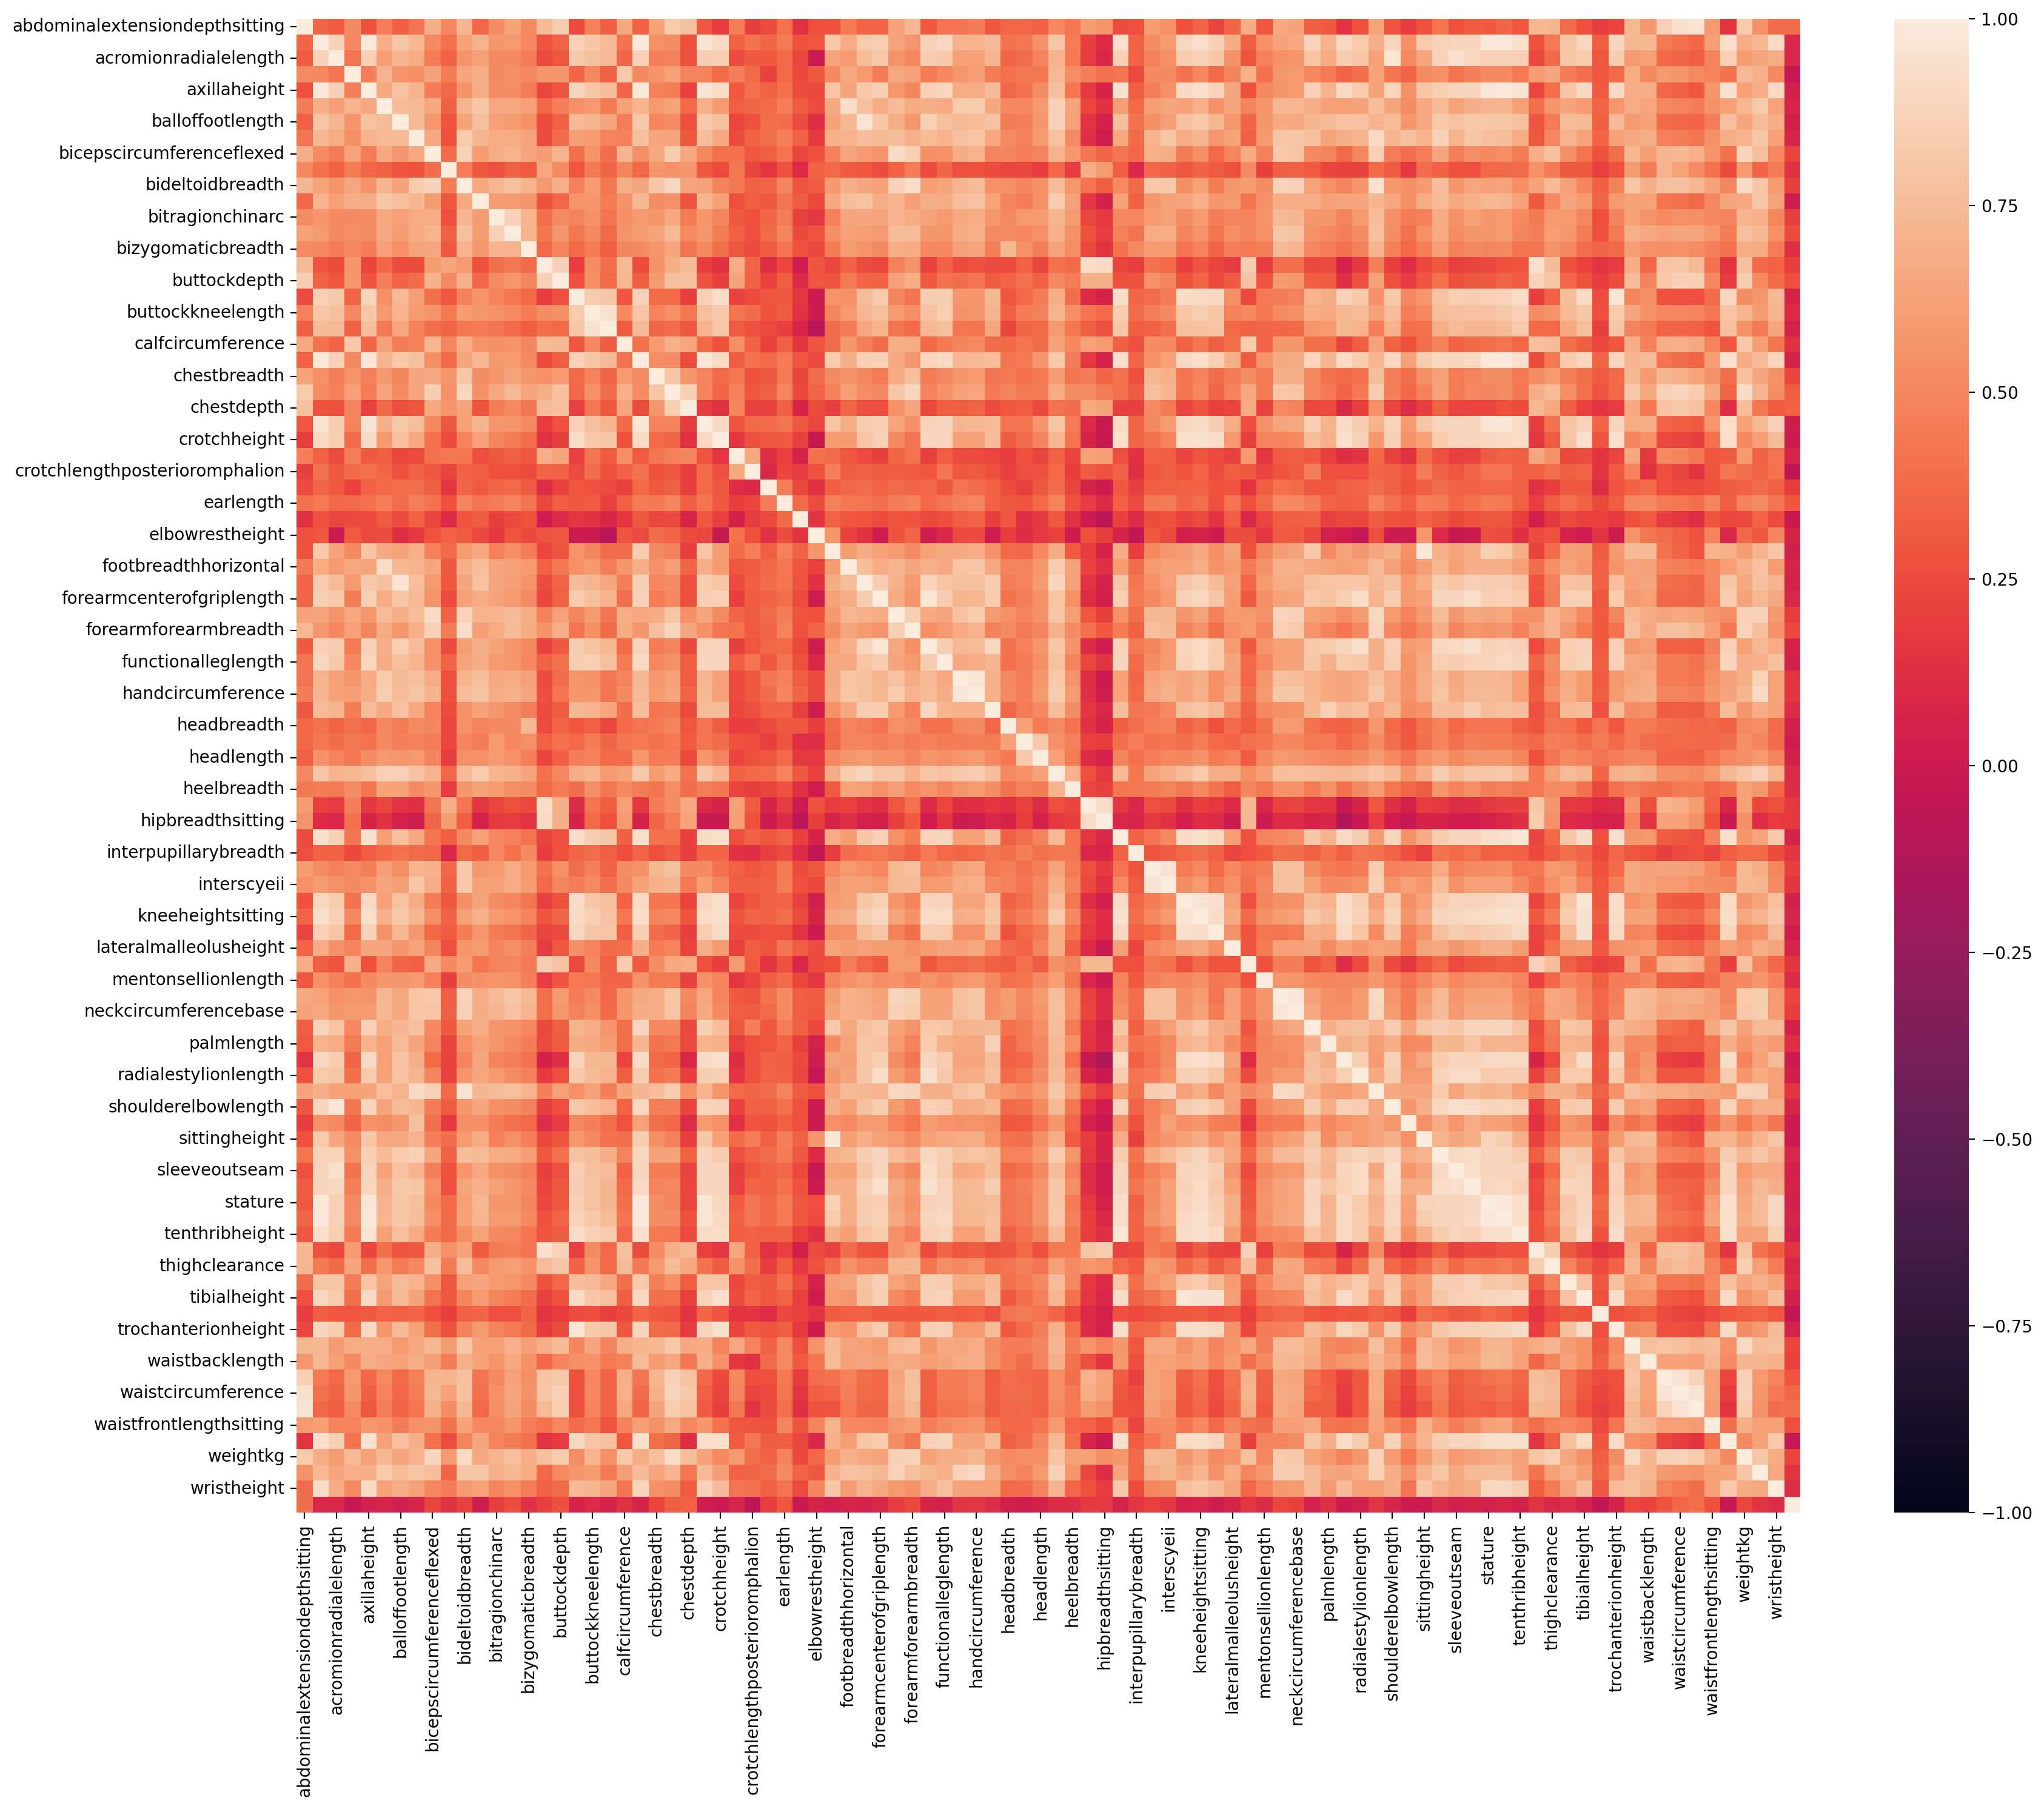

In [17]:
#the correlation matrix
corr_matrix = df.corr(numeric_only=True)

pd.set_option("display.max_rows", None)

def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(corr_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(corr_matrix, vmin=-1, vmax=1);

In [18]:
df.shape

(5769, 98)

In [19]:
# This is a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [20]:
# This is a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [21]:
# to overcome the high cardinality problem in the SubjectsBirthLocation feature.
# We will use the following approach:
# 1. We will create a dictionary with the states by region
# 2. We will create a dictionary with the countries by continent
# 3. We will replace the values in the column "SubjectsBirthLocation" with the values from the dictionaries

df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

# We tired this but it didn't work well.
# df["SubjectsBirthLocation"] = [states_by_region[i] if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
# df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California       417
New York         411
Texas            386
North America    264
Indiana          264
                ... 
Vermont           13
Montana           12
Alaska             7
Wyoming            7
Oceania            4
Name: count, Length: 57, dtype: int64

In [26]:
df["SubjectsBirthLocation"].nunique()

57

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [27]:
# Encode nominal categorical features
cat = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [28]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [29]:
# Split the data
X = df.drop(["DODRace"], axis=1)
y = df["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

## 1. Logistic model

### Vanilla Logistic Model

In [30]:
st_scaler = StandardScaler()

log = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", st_scaler), ("logistic", log)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [31]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[232  14  14]
 [  9  80  47]
 [  8  26 724]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.67      0.59      0.62       136
       White       0.92      0.96      0.94       758

    accuracy                           0.90      1154
   macro avg       0.84      0.81      0.83      1154
weighted avg       0.89      0.90      0.90      1154


Train_Set
[[ 967   16   55]
 [  30  334  179]
 [  30   71 2933]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.94      1038
    Hispanic       0.79      0.62      0.69       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.89      0.84      0.86      4615
weighted avg       0.91      0.92      0.91      4615



### Cross Validation

In [33]:
# Define your operations as before
operations = [("encoder", column_trans), ("scaler", st_scaler), ("logistic", log)]

# Create the pipeline
pipe_model = Pipeline(steps=operations)

# Perform cross-validation without returning fit time and score time
scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True  # Remove fit time and score time
)

# Create a DataFrame from the results and calculate the mean
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]


test_accuracy               0.894692
train_accuracy              0.919466
test_precision_weighted     0.890237
train_precision_weighted    0.916112
test_recall_weighted        0.894692
train_recall_weighted       0.919466
test_f1_weighted            0.890301
train_f1_weighted           0.916202
dtype: float64

In [34]:
# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=['Hispanic'])
precision_hispanic = make_scorer(precision_score, average=None, labels=['Hispanic'])
recall_hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])

scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}


In [35]:
operations = [("encoder", column_trans), ("scaler", st_scaler), ("logistic", log)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.drop(columns=["fit_time", "score_time"], inplace=True)
print(df_scores.mean())

test_f1_hispanic            0.629175
train_f1_hispanic           0.697482
test_precision_hispanic     0.733432
train_precision_hispanic    0.796471
test_recall_hispanic        0.554276
train_recall_hispanic       0.620420
dtype: float64


### Logistic Model GridsearchCV

In [36]:
operations = [("encoder", column_trans), ("scaler", st_scaler), ("logistic", log)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [37]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    solver='saga'))])

In [38]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.764186
mean_train_score    0.815827
Name: 11, dtype: object

In [39]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[231  20   9]
 [  7 109  20]
 [ 14  92 652]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.90       260
    Hispanic       0.49      0.80      0.61       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 950   50   38]
 [  27  441   75]
 [  70  363 2601]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1038
    Hispanic       0.52      0.81      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.79      0.86      0.82      4615
weighted avg       0.89      0.87      0.87      4615



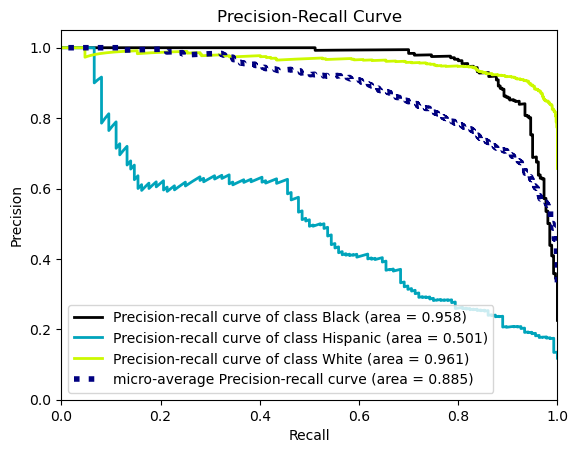

In [109]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [110]:
y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.500748622403134

In [111]:
y_pred = grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Since we will compare the scores we got from all models in the table below,
# we assign model scores to the variables.

## 2.  SVC

### Vanilla SVC model

In [327]:
operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   5  27]
 [ 10  55  71]
 [  4  11 743]]
              precision    recall  f1-score   support

       Black       0.94      0.88      0.91       260
    Hispanic       0.77      0.40      0.53       136
       White       0.88      0.98      0.93       758

    accuracy                           0.89      1154
   macro avg       0.87      0.75      0.79      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[ 955   10   73]
 [  30  270  243]
 [   8   19 3007]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94      1038
    Hispanic       0.90      0.50      0.64       543
       White       0.90      0.99      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.92      0.80      0.84      4615
weighted avg       0.92      0.92      0.91      4615



In [328]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.560954
train_f1_hispanic           0.640683
test_precision_hispanic     0.833938
train_precision_hispanic    0.904859
test_recall_hispanic        0.423704
train_recall_hispanic       0.496008
dtype: float64

In [329]:
#SVM with balancing
operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[232  14  14]
 [  6 104  26]
 [ 11  79 668]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       260
    Hispanic       0.53      0.76      0.62       136
       White       0.94      0.88      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.85      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[ 986   27   25]
 [  10  503   30]
 [  37  283 2714]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.62      0.93      0.74       543
       White       0.98      0.89      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.92      0.88      4615
weighted avg       0.93      0.91      0.92      4615



In [330]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic            0.582582
train_f1_hispanic           0.739165
test_precision_hispanic     0.491690
train_precision_hispanic    0.615207
test_recall_hispanic        0.718350
train_recall_hispanic       0.925926
dtype: float64

###  SVC Model GridsearchCV

In [41]:
param_grid = {'SVC__C': [0.01, 0.03, 0.02, 0.1],
               'SVC__gamma': [0.03,0.01 ,0.1],
             }

operations = [("encoder", column_trans), ("scaler", st_scaler),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)

In [42]:
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.03, 0.02, 0.1],
                         'SVC__gamma': [0.03, 0.01, 0.1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [43]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('SVC', SVC(C=0.1, gamma=0.01))])

In [48]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.173098
mean_train_score     0.18171
Name: 10, dtype: object

In [47]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[158   1 101]
 [  5  26 105]
 [  0   2 756]]
              precision    recall  f1-score   support

       Black       0.97      0.61      0.75       260
    Hispanic       0.90      0.19      0.32       136
       White       0.79      1.00      0.88       758

    accuracy                           0.81      1154
   macro avg       0.88      0.60      0.65      1154
weighted avg       0.84      0.81      0.78      1154


Train_Set
[[ 645    8  385]
 [  27  108  408]
 [   2    8 3024]]
              precision    recall  f1-score   support

       Black       0.96      0.62      0.75      1038
    Hispanic       0.87      0.20      0.32       543
       White       0.79      1.00      0.88      3034

    accuracy                           0.82      4615
   macro avg       0.87      0.61      0.65      4615
weighted avg       0.84      0.82      0.79      4615



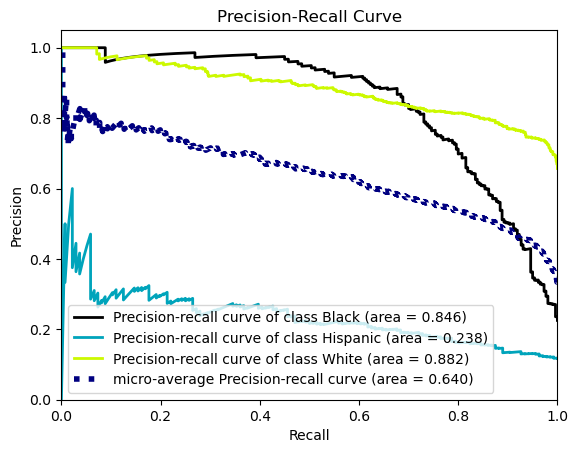

In [112]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [113]:
decision_function

array([[-0.07991997,  0.88535284,  2.1521373 ],
       [-0.1656885 ,  2.11110273,  1.10937725],
       [ 1.09180976, -0.21563928,  2.19739401],
       ...,
       [ 0.97934512,  2.20129201, -0.19774402],
       [-0.14339525,  2.16289494,  0.94426331],
       [-0.16365305,  0.91387346,  2.18921273]])

In [114]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [115]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.23795966456544979

In [117]:
y_pred = SVM_pipe_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [49]:
cat

['Gender', 'WritingPreference', 'SubjectsBirthLocation']

In [50]:
column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [52]:
operations_rf = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

rf_pipe_model = Pipeline(steps=operations_rf)

rf_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [53]:
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[194   4  62]
 [  9   6 121]
 [ 13   5 740]]
              precision    recall  f1-score   support

       Black       0.90      0.75      0.82       260
    Hispanic       0.40      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.70      0.59      0.59      1154
weighted avg       0.78      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [55]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic            0.066860
train_f1_hispanic           1.000000
test_precision_hispanic     0.803333
train_precision_hispanic    1.000000
test_recall_hispanic        0.034981
train_recall_hispanic       1.000000
dtype: float64

### RF Model GridsearchCV

In [64]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [65]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
    # 'RF_model__min_samples_split':[18,20,22],
    # 'RF_model__max_features': ['auto', None, 15, 20]
}

In [66]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [67]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [68]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [69]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [70]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.598454
mean_train_score    0.635821
Name: 0, dtype: object

In [71]:
rf_grid_model.best_score_

0.5984539585457017

In [72]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[178  57  25]
 [ 11  87  38]
 [ 68 301 389]]
              precision    recall  f1-score   support

       Black       0.69      0.68      0.69       260
    Hispanic       0.20      0.64      0.30       136
       White       0.86      0.51      0.64       758

    accuracy                           0.57      1154
   macro avg       0.58      0.61      0.54      1154
weighted avg       0.74      0.57      0.61      1154


Train_Set
[[ 718  201  119]
 [  42  356  145]
 [ 241 1103 1690]]
              precision    recall  f1-score   support

       Black       0.72      0.69      0.70      1038
    Hispanic       0.21      0.66      0.32       543
       White       0.86      0.56      0.68      3034

    accuracy                           0.60      4615
   macro avg       0.60      0.63      0.57      4615
weighted avg       0.76      0.60      0.64      4615



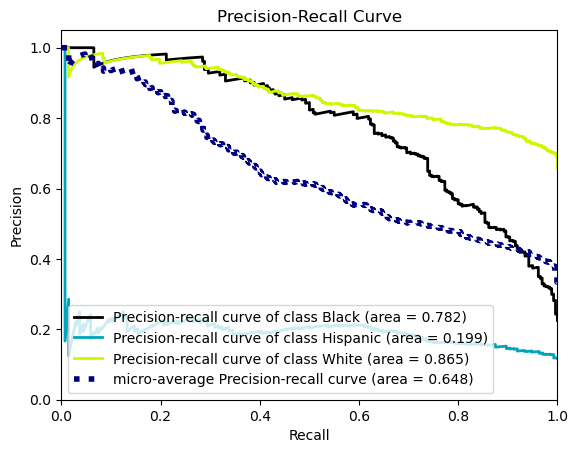

In [73]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [118]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.500748622403134

In [119]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [74]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.
pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [75]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[217   8  35]
 [  7  54  75]
 [ 11  10 737]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88       260
           1       0.75      0.40      0.52       136
           2       0.87      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.85      0.73      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [77]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

# XGboost algorithm has no class_weight hyperparameter for multiclass.
# We can use the sample_weight hyperparameter within the fit function.

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [83]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
5165,0.507031,2
5393,0.507031,2
5659,0.507031,2
3628,0.507031,2
2914,0.507031,2


In [84]:
comp.groupby("label").value_counts()

# weight x class will give us the same results.

label  weights 
0      1.482017    1038
1      2.833026     543
2      0.507031    3034
Name: count, dtype: int64

In [85]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore,
# we need to assign the weight of each class to its instances,
# which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [86]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[225  12  23]
 [ 10  69  57]
 [ 14  15 729]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       260
           1       0.72      0.51      0.59       136
           2       0.90      0.96      0.93       758

    accuracy                           0.89      1154
   macro avg       0.84      0.78      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [87]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

# Since xgb does not accept non-encoded targets, we arrange the scoring_xgb
# according to the 1 numeric class corresponding to hispanics.

In [88]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.725444
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.467771
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.568341
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [95]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [96]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [97]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [98]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [99]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [100]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.578304
mean_train_score    0.640421
Name: 31, dtype: object

In [101]:
xgb_grid_model.best_score_

0.578304451240231

In [102]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[197  46  17]
 [ 18  82  36]
 [ 90 181 487]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       260
           1       0.27      0.60      0.37       136
           2       0.90      0.64      0.75       758

    accuracy                           0.66      1154
   macro avg       0.60      0.67      0.61      1154
weighted avg       0.77      0.66      0.69      1154


Train_Set
[[ 799  139  100]
 [  63  344  136]
 [ 308  647 2079]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1038
           1       0.30      0.63      0.41       543
           2       0.90      0.69      0.78      3034

    accuracy                           0.70      4615
   macro avg       0.63      0.70      0.64      4615
weighted avg       0.78      0.70      0.72      4615



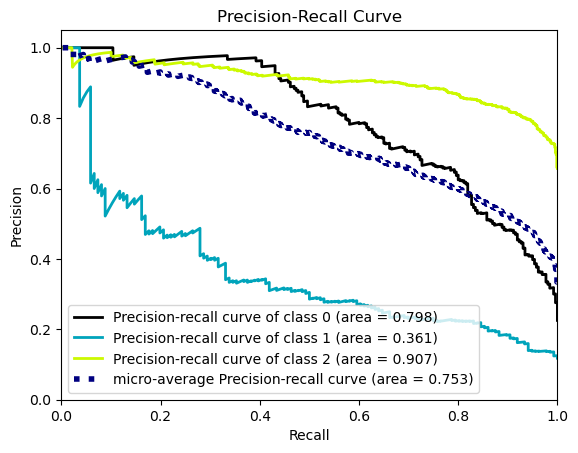

In [104]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=1,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=40,
            subsample=1,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [123]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [124]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.500748622403134

In [125]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

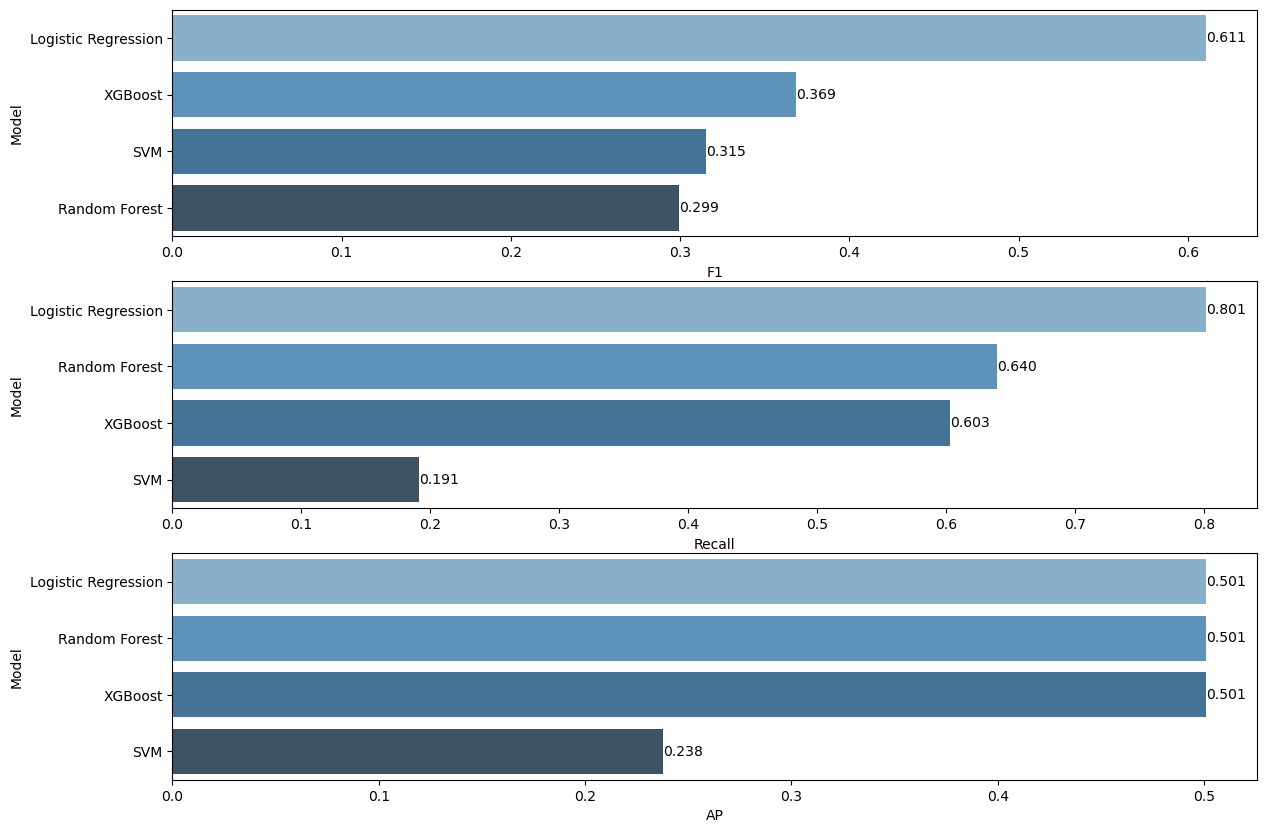

In [126]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## Smote implement

In [127]:
!pip install imblearn

In [180]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [181]:
X_train_ohe = column_trans.fit_transform(X_train)

In [182]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

In [183]:
y_train_over.value_counts()

DODRace
White       3034
Black       3034
Hispanic    3034
Name: count, dtype: int64

In [184]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [185]:
y_train_under.value_counts()

DODRace
Black       543
Hispanic    543
White       543
Name: count, dtype: int64

In [186]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [187]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

In [188]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [189]:
y_resampled_over.value_counts()

DODRace
White       3034
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [190]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [191]:
y_resampled_under.value_counts()

DODRace
White       2500
Black       1038
Hispanic     543
Name: count, dtype: int64

In [198]:
# We automate our over_sampling and under_sampling processes.
steps = [("o", over), ("u", under)]


pipeline = imbpipeline(steps=steps)

# First the number of hispanic cals will be increased to 1000 as per our instruction,
# and then the white class will be reduced to 2500.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [199]:
y_resampled.value_counts()

DODRace
White       2500
Black       1038
Hispanic    1000
Name: count, dtype: int64

In [200]:
y_train.value_counts()

DODRace
White       3034
Black       1038
Hispanic     543
Name: count, dtype: int64

## Logistic Over/Under Sampling

In [201]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [202]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
] 

In [203]:
smote_pipeline = imbpipeline(steps=operations)

In [204]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [205]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[231  17  12]
 [  5  95  36]
 [  5  42 711]]
              precision    recall  f1-score   support

       Black       0.96      0.89      0.92       260
    Hispanic       0.62      0.70      0.66       136
       White       0.94      0.94      0.94       758

    accuracy                           0.90      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 934   38   66]
 [  26  381  136]
 [  30  144 2860]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92      1038
    Hispanic       0.68      0.70      0.69       543
       White       0.93      0.94      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.90      0.91      4615



In [206]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.637894
train_precision_Hispanic    0.673514
test_recall_Hispanic        0.655623
train_recall_Hispanic       0.705345
test_f1_Hispanic            0.644468
train_f1_Hispanic           0.689008
dtype: float64

![img](CLARUSWAY_400_86_NO_MOTTO.png)
